# Online Payment Fraud Detection Model With Bagging

## Background

According to the statistics about the online payment fraud in statistia, e-commerce losses to online payment fraud were estimated at 41 billion U.S. 
dollars globally in 2022.[https://www.statista.com/statistics/1273177/ecommerce-payment-fraud-losses-globally/] 

Due to such kind of huge loss, a related association requests an online payment fraud detecion model to prevent such a huge loss to the association. 

Some standards need to be fulfilled by the online payment fraud detection model.


## Requirement

- 90% above accuracy
- 0.75 above recall score
- 0.8 above precision score
- 0.8 above f1 score

## Online Payment Fraud Dataset

In [33]:
variable = data.columns
Description = ["represents a unit of time where 1 steps equal 1 hour", 'type of online transaction','the amount of transaction','customer starting the transaction','balance before the transcation','balance after the transaction','recipient of the transaction','initial balance of recipient before the transaction','the new balance of recipient after transaction','whether is fraud detection']
variable = pd.DataFrame(variable)
Description = pd.DataFrame(Description)
data_des = pd.concat([variable, Description], axis =1)
data_des.columns=["Variable", "Description"]
data_des

,Variable,Description
0,step,represents a unit of time where 1 steps equal ...
1,type,type of online transaction
2,amount,the amount of transaction
3,nameOrig,customer starting the transaction
4,oldbalanceOrg,balance before the transcation
5,newbalanceOrig,balance after the transaction
6,nameDest,recipient of the transaction
7,oldbalanceDest,initial balance of recipient before the transa...
8,newbalanceDest,the new balance of recipient after transaction
9,isFraud,whether is fraud detection


## Python Library

In [81]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Import Dataset

In [83]:
data = pd.read_csv("online_payment.csv")

## Viewing the Dataset

In [35]:
#showing the shape of the dataset
print("The shape of the dataset: "+str(data.shape[0]) +" X "+ str(data.shape[1])+"\n")

# showing the 5 data in the dataset
print(data.head(5))

The shape of the dataset: 1048575 X 10

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


## Data Cleansing

- Check missing value in the dataset
- Check data type of each column in the dataset
- Check Validacy of the dataset

### Check missing value in the dataset

In [41]:
# Check whether have missing value
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

No missing value in this dataset

### Check data type of each column in dataset

In [45]:
# Show the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


From the above, no invalid data type found

### Check Validacy of the dataset

In [69]:
#Check whether have invalid type of payment

print("The type of the payment:"+str(data["type"].unique())+"\n")

#Check the unique value in isFraud column to ensure only 0 and 1 

print("The value in isFraud Column:"+str(data["isFraud"].unique())+"\n")

# Check whether have negative balance or negative amount of transaction
print(data.describe())


The type of the payment:['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

The value in isFraud Column:[0 1]

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06  
mean     9.781600e+05    1.114198e+06  1.089097e-03  
std      2.296780e+06    2.416593e+06  3.298351e-02  
min      0.000000e+00    0.000000e+00  0.000000e+00  
25%  

From the above, no invalid data value found

## Feature Engineering

- One hot encoding the type column
- Extract information from nameOrig to form len_customer_code
- Combine oldbalanceOrg and newbalanceOrig to form change_in_customer_balance
- Extract information from nameDest to form len_recipient_code and recipient_type
- One hot encoding the recipient_type column
- Combine oldbalanceDest and newbalanceDest to form change_in_recipient_balance

### One hot encoding the type column

In [5]:
# one hot encoding the type column
data_subset = pd.get_dummies(data =data, columns = ["type"], dtype =int)

In [82]:
# show the after one hot encoding dataset
data_subset

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0,0,0,1,0


### Extract information from nameOrig to form len_customer_code

Reason:

Typically, the bank will increase the number of digit in the customer code if the number of customer code digit is not enough to distinguish unique customers.

Therefore, the length of the customer code contains information of distinguish how new the customer to bank.

In [7]:
# Extract the length of the customer code
def check (x):
    return len(x)
data_subset["len_customer_code"] =data_subset["nameOrig"].apply(check)

In [9]:
# Show the unique value in the customer code

data_subset["len_customer_code"].unique()

array([11, 10,  9,  8,  7,  6,  5], dtype=int64)

In [11]:
#Drop the nameOrig column
data_subset = data_subset.drop(columns="nameOrig")

### Combine oldbalanceOrg and newbalanceOrig to form change_in_customer_balance

Action:

Extract the change of customer balance account record during the transaction to form change_in_customer_balance 

In [13]:
# Form change_in_customer_balance
data_subset["change_in_customer_balance"] = data_subset["newbalanceOrig"] - data_subset["oldbalanceOrg"]

#Drop the oldbalanceOrg and newbalanceOrig columns
data_subset = data_subset.drop(columns= ["newbalanceOrig", "oldbalanceOrg"])

In [15]:
#Show the transformed dataset
data_subset.head(3)

,step,amount,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,len_customer_code,change_in_customer_balance
0,1,9839.64,M1979787155,0.0,0.0,0,0,0,0,1,0,11,-9839.64
1,1,1864.28,M2044282225,0.0,0.0,0,0,0,0,1,0,11,-1864.28
2,1,181.00,C553264065,0.0,0.0,1,0,0,0,0,1,11,-181.00


### Extract information from nameDest to form len_recipient_code and recipient_type

Reason:

Typically, the bank will increase the number of digit in recipient code if the number of digit is not enough to distinguish the unique recipient. 

Therefore, the number of digit in the code is the information od distinguish how new the recipient to bank.

Also, the first English character in the code helps distinguish the type of the recipient. Therefore, extract it to form recipient_type column

In [17]:
# Extract the length of the recipient code
data_subset["len_recipient_code"] = data_subset["nameDest"].apply(check)

#Extract the first character from the recipient code
def ext (x):
    return x[0]
data_subset["recipient_type"] = data_subset["nameDest"].apply(ext)

#Drop the nameDest column
data_subset = data_subset.drop(columns="nameDest")

In [19]:
# Show the unique value in recipient_type
print("Unique value in recipient type:"+str(data_subset["recipient_type"].unique()))

#Show the unique value in length of the recipient code:
print("\nUnique value in length of the recipient code:"+str(data_subset["len_recipient_code"].unique()))

Unique value in recipient type:['M' 'C']

Unique value in length of the recipient code:[11 10  9  8  7  4  6  5]


In [140]:
#Show the transformed dataset

data_subset.head(5)

,step,amount,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,len_customer_code,change_in_customer_balance,len_recipient_code,recipient_type
0,1,9839.64,0.0,0.0,0,0,0,0,1,0,11,-9839.64,11,M
1,1,1864.28,0.0,0.0,0,0,0,0,1,0,11,-1864.28,11,M
2,1,181.00,0.0,0.0,1,0,0,0,0,1,11,-181.00,10,C
3,1,181.00,21182.0,0.0,1,0,1,0,0,0,10,-181.00,9,C
4,1,11668.14,0.0,0.0,0,0,0,0,1,0,11,-11668.14,11,M


### One hot encoding the recipient_type column

In [21]:
#One hot encoding the recipient_type column

data_subset = pd.get_dummies(data= data_subset, columns=["recipient_type"], dtype = int)

In [23]:
# Show the transformed dataset

data_subset.head(3)

,step,amount,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,len_customer_code,change_in_customer_balance,len_recipient_code,recipient_type_C,recipient_type_M
0,1,9839.64,0.0,0.0,0,0,0,0,1,0,11,-9839.64,11,0,1
1,1,1864.28,0.0,0.0,0,0,0,0,1,0,11,-1864.28,11,0,1
2,1,181.00,0.0,0.0,1,0,0,0,0,1,11,-181.00,10,1,0


### Combine oldbalanceDest and newbalanceDest to form change_in_recipient_balance

Action:

Extract the change of the recipient balance during the transaction to form change_in_recipient_balance

In [25]:
#Form change_in_recipient_balance column
data_subset["change_in_recipient_balance"] = data_subset["newbalanceDest"] -data_subset["oldbalanceDest"]

#Drop the newbalanceDest and oldbalanceDest columns
data_subset = data_subset.drop(columns = ["newbalanceDest", "oldbalanceDest"])


In [27]:
#Show the transformed dataset

data_subset.head(3)

,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,len_customer_code,change_in_customer_balance,len_recipient_code,recipient_type_C,recipient_type_M,change_in_recipient_balance
0,1,9839.64,0,0,0,0,1,0,11,-9839.64,11,0,1,0.0
1,1,1864.28,0,0,0,0,1,0,11,-1864.28,11,0,1,0.0
2,1,181.00,1,0,0,0,0,1,11,-181.00,10,1,0,0.0


In [29]:
#Show the columns name of the transformed dataset

data_subset.columns

Index(['step', 'amount', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'len_customer_code',
       'change_in_customer_balance', 'len_recipient_code', 'recipient_type_C',
       'recipient_type_M', 'change_in_recipient_balance'],
      dtype='object')

## Split the dataset into Train data and Test data

In [31]:
#split the dataset into predictor variable and response variable
X= data_subset.drop(columns ="isFraud")
y= data_subset["isFraud"]

#split into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Build the first online payment fraud detection model with only Decision Tree

In [185]:
#Build Decision Tree Model
clf = DecisionTreeClassifier(random_state = 0)

#Set a set of parameter to perform a grid search 5-cross validation

para = {"max_depth":[10,20],
        "min_samples_split":[10,30,50],
        "min_samples_leaf":[1,10,20]
        }

#Use grid search to find best model
cv = GridSearchCV(estimator=clf, param_grid = para, scoring = ['accuracy','recall','precision', 'f1'], refit = 'f1')

cv.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [10, 30, 50]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'])

In [191]:
#Output the best model in Grid Search
cv.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       random_state=0)

In [211]:
#Metrics of the best model to the validation data

res = pd.DataFrame(cv.cv_results_)
res[res['mean_test_f1']==res['mean_test_f1'].max()].loc[:,["mean_test_accuracy","mean_test_recall","mean_test_precision","mean_test_f1"]]

,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
12,0.99964,0.73396,0.92212,0.817058


In [85]:
#Build the best model
clf_best = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       random_state=0)
model = clf_best.fit(X_train, y_train)

In [87]:
#Obtain the metrics on the test data

y_pred = model.predict(X_test)
metrics = pd.DataFrame({"accuracy":[accuracy_score(y_test, y_pred)],
                       "recall":[recall_score(y_test, y_pred)],
                       "precision":[precision_score(y_test, y_pred)],
                       "f1":[f1_score(y_test, y_pred)]})
metrics

,accuracy,recall,precision,f1
0,0.999614,0.642534,0.986111,0.778082


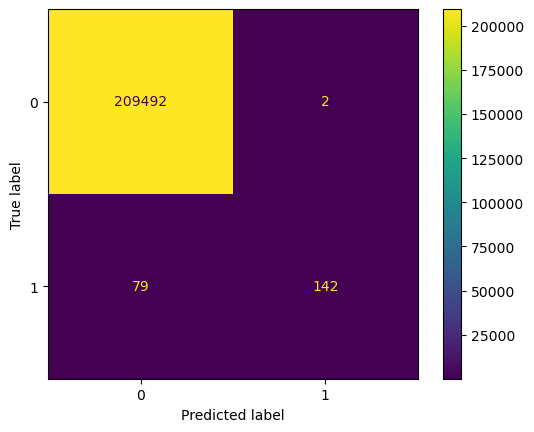

In [89]:
#confusion Matrix

con =confusion_matrix(y_test, y_pred)
con_dis = ConfusionMatrixDisplay(con, display_labels = model.classes_)
con_dis.plot()

### Analysis of the performance of the model

This decision tree model can correctly identify 64.3% of the online payment fraud in the test dataset. 

Among the labeled as online payment fraud by the model, about 98.6% are really online payment fraud. 

In order to boost the performance of the model to a higher level, Bagging is used

## Boost the performance with Bagging

Model used:
- Three Decision Tree
- Naive Bayes
- Logistic Regression

Procedure:
- Draw 20% of samples from training dataset with replacement as training data of a model and train the model
- Repeat Step 1 to Decision Tree, Naive Bayes and Logistic Regression
- Test those three models with testing data
-  Label the record of test data as isFraud if half of the models predict that record as isFraud, vice versa

### Draw the training data to the model with replacement

In [91]:
# Draw the sample with replacement
data_index_decision_1 = np.random.choice([i for i in range(X_train.shape[0])],size = round(X.shape[0]*0.2), replace =True)
data_index_decision_2 = np.random.choice([i for i in range(X_train.shape[0])],size = round(X.shape[0]*0.2), replace =True)
data_index_decision_3 = np.random.choice([i for i in range(X_train.shape[0])],size = round(X.shape[0]*0.2), replace =True)
data_index_nb =  np.random.choice([i for i in range(X_train.shape[0])],size = round(X.shape[0]*0.2), replace =True)
data_index_log = np.random.choice([i for i in range(X_train.shape[0])],size = round(X.shape[0]*0.2), replace =True)

In [93]:
X_decision_1 = X_train.iloc[data_index_decision_1,:]
y_decision_1 = y_train.iloc[data_index_decision_1]

X_decision_2 = X_train.iloc[data_index_decision_2,:]
y_decision_2 = y_train.iloc[data_index_decision_2]

X_decision_3 = X_train.iloc[data_index_decision_3,:]
y_decision_3 = y_train.iloc[data_index_decision_3]

X_nb =  X_train.iloc[data_index_nb,:]
y_nb = y_train.iloc[data_index_nb]

X_log = X_train.iloc[data_index_log,:]
y_log = y_train.iloc[data_index_log]

### Train the Model with corresponding training data

In [95]:
#Train the first Decision Tree Model

clf_best_bag = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       random_state=0)
model_decision_1 = clf_best_bag.fit(X_decision_1, y_decision_1)


In [40]:
#Train the second Decision Tree Model

clf_best_bag = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       random_state=0)
model_decision_2 = clf_best_bag.fit(X_decision_2, y_decision_2)


In [42]:
#Train the thrid Decision Tree Model

clf_best_bag = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       random_state=0)
model_decision_3 = clf_best_bag.fit(X_decision_3, y_decision_3)


In [46]:
#Train the Logistic Regression Model

clf_log = LogisticRegression(random_state=0,solver = "sag", max_iter= 10000)
model_log = clf_log.fit(X_log, y_log)

In [44]:
#Train the Naive Bayes Model

gnb = BernoulliNB()
model_nb = gnb.fit(X_nb,y_nb)


### Test the Model with testing data

In [48]:
#Test the model with test data

def scores (x):
    if x < 3:
        return 0
    else: 
        return 1


y_pred = model_decision_1.predict(X_test) +model_decision_2.predict(X_test)+model_decision_3.predict(X_test)+ model_log.predict(X_test) + model_nb.predict(X_test)
y_pred_dt = pd.DataFrame({"pred":y_pred})
y_pred_test = y_pred_dt["pred"].apply(scores)



Metrics of the test performance

In [62]:
metrics = pd.DataFrame({"accuracy":[accuracy_score(y_test, y_pred_test)],
                       "recall":[recall_score(y_test, y_pred_test)],
                       "precision":[precision_score(y_test, y_pred_test)],
                       "f1":[f1_score(y_test, y_pred_test)]})
metrics

,accuracy,recall,precision,f1
0,0.999685,0.751131,0.937853,0.834171


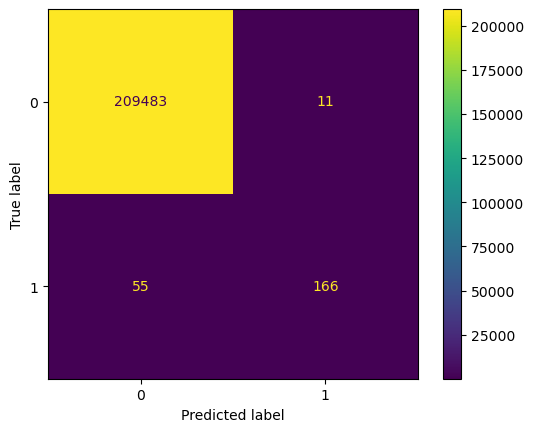

In [64]:
#confusion Matrix

con =confusion_matrix(y_test, y_pred_test)
con_dis = ConfusionMatrixDisplay(con, display_labels = model_decision_1.classes_)
con_dis.plot()

### Analysis of the Result

From the above, the recall score after using bagging has increased from 0.64 to 0.75. That means the model can catch 10% more of the online payment

fraud than the previous model. Although the precision has dropped from 0.986 to 0.937, the f1 score has raised from 0.778 to 0.834. That means the

raise in recall score can compensate the impact of the drop in the precision score. Therefore, the performance of the online payment fraud detection 

model increases.

The model also fits the standard required.

- 90% above accuracy
- 0.75 above recall score
- 0.8 above precision score
- 0.8 above f1 score

## Value of this model

As the model has a recall score of 0.751, it is expected that the model can catch the 75.1% of the online payment fraud. 

From statistics in Ravelin,[https://www.ravelin.com/insights/online-payment-fraud]

Online payment fraud costs global businesses 1.8% of revenue. If a company has a revenue of 10 million per year, the model can prevent $135180 loss per 

year due to online payment fraud.